# Analisando as proposições de 2010 - 2014

### Os dados utilizados se encontram no portal de dados abertos da Câmara dos Deputados como sendo referentes aos anos de 2010 até 2014.

#### Link do portal: https://dadosabertos.camara.leg.br/swagger/api.html

#### Foi feito o download do arquivo no formato json disponibilizado no site, o mesmo foi processado por um script feito em python responsável por realizar o parsing e gerar um outro arquivo no formato csv.

#### Carregamento dos dados:

In [3]:
import pandas as pd

data = pd.read_csv('proposicoes/proposicoes_2010_2014.csv', encoding = 'utf8', header = 0)

## Visão Geral

In [4]:
data.shape

(11307, 56)

#### O arquivo contém, portanto, 11307 linhas com proposições e 56 colunas para cada uma. Três primeiras linhas:

In [3]:
data.head(3)

,COD_ORGAO_ORIGEM,NUM_LEGISLATURA_APRESEN,NUM_LEGISLATURA_LEI,NOM_PARTIDO_POLITICO,DAT_VETO_TOTAL,NOM_UF,DES_TIPO_PROPOSICAO,DES_COMPLETA,COD_TIPO_NORMA_JURIDICA_ORIGEM,SIG_UF,...,COD_TIPO_AUTOR_ORIGEM,NUM_SESSAO_LEGISLATIVA_LEI,DAT_FIM_LEGISLATURA_APRESEN,SIG_PARTIDO_POLITICO,IND_ATIVO_TIPO_PROPOSICAO,DAT_INICIO_LEGISLATURA_APRESEN,NUM_PROPOSICAO,COD_TIPO_SESSAO_LEGISLATIVA_LEI,NOM_PARLAMENTAR,DAT_FINAL_RECESSO_APRESEN
0,-1,54,-1,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,NaN,ALAGOAS,PROJETO DE LEI,PROJETO DE LEI,-1,AL,...,TipoParlamentar_10000,-1.0,31-01-2015,PMDB,1,01-02-2011,2429.0,-1.0,JOAQUIM BELTRÃO,01-08-2011
1,-1,54,-1,PARTIDO VERDE,NaN,RIO DE JANEIRO,PROJETO DE LEI,PROJETO DE LEI,-1,RJ,...,TipoParlamentar_10000,-1.0,31-01-2015,PV,1,01-02-2011,2438.0,-1.0,ALFREDO SIRKIS,01-08-2011
2,-1,54,-1,PARTIDO DOS TRABALHADORES,NaN,AMAPÁ,PROPOSTA DE EMENDA À CONSTITUIÇÃO,PROPOSTA DE EMENDA À CONSTITUIÇÃO (ART. 60 CF ...,-1,AP,...,TipoParlamentar_10000,-1.0,31-01-2015,PT,1,01-02-2011,86.0,-1.0,DALVA FIGUEIREDO,01-08-2011


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11307 entries, 0 to 11306
Data columns (total 56 columns):
COD_ORGAO_ORIGEM                         11307 non-null int64
NUM_LEGISLATURA_APRESEN                  11307 non-null int64
NUM_LEGISLATURA_LEI                      11307 non-null int64
NOM_PARTIDO_POLITICO                     8859 non-null object
DAT_VETO_TOTAL                           18 non-null object
NOM_UF                                   8859 non-null object
DES_TIPO_PROPOSICAO                      11307 non-null object
DES_COMPLETA                             11249 non-null object
COD_TIPO_NORMA_JURIDICA_ORIGEM           11307 non-null int64
SIG_UF                                   8859 non-null object
DAT_FIM_LEGISLATURA_LEI                  1542 non-null object
COD_PROPOSICAO_ORIGEM                    11303 non-null float64
DES_ATIVO_TIPO_PROPOSICAO                11307 non-null object
NOM_ORGAO                                2446 non-null object
DES_APELIDO_ORGAO   

In [5]:
data.isnull().any()

COD_ORGAO_ORIGEM                         False
NUM_LEGISLATURA_APRESEN                  False
NUM_LEGISLATURA_LEI                      False
NOM_PARTIDO_POLITICO                      True
DAT_VETO_TOTAL                            True
NOM_UF                                    True
DES_TIPO_PROPOSICAO                      False
DES_COMPLETA                              True
COD_TIPO_NORMA_JURIDICA_ORIGEM           False
SIG_UF                                    True
DAT_FIM_LEGISLATURA_LEI                   True
COD_PROPOSICAO_ORIGEM                     True
DES_ATIVO_TIPO_PROPOSICAO                False
NOM_ORGAO                                 True
DES_APELIDO_ORGAO                         True
DATAPRESENTACAOPROPOSICAO                False
DES_TIPO_AUTOR                           False
COD_SEXO                                  True
IND_ATIVO_ORGAO                          False
COD_TIPO_PARLAMENTAR                     False
DES_TIPO_NORMA_JURIDICA                   True
DES_TIPO_SESS

#### Das 56 totais, apenas 20 colunas estão completas, as outras possuem pelo menos uma linha sem informação.

### Veremos agora as relações entre as proposições e as informações de algumas colunas.

## Proposições x Estados

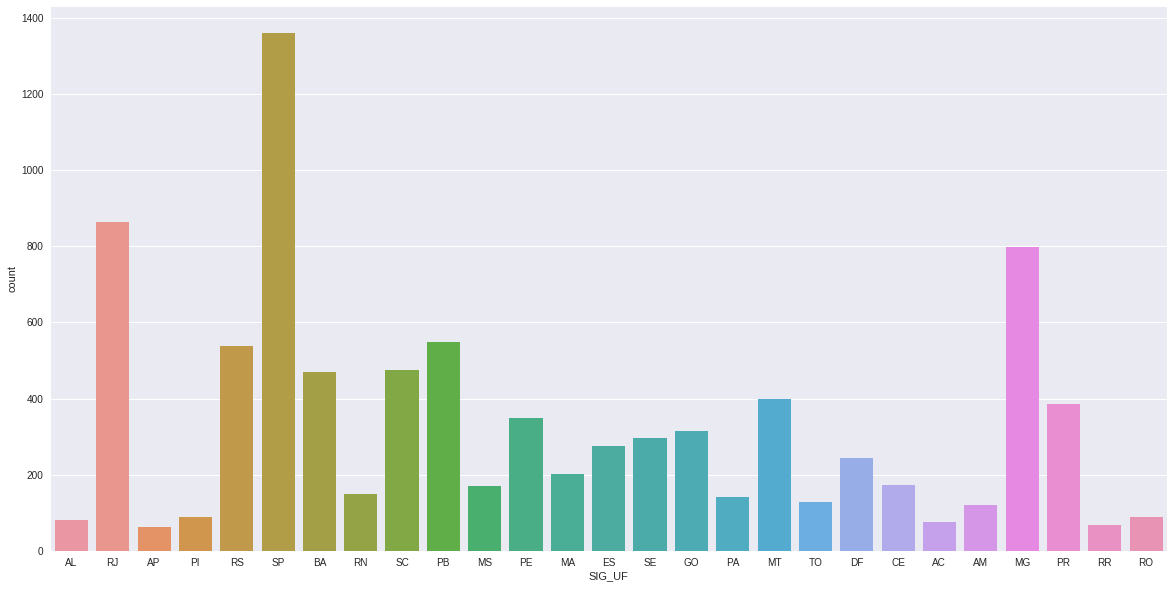

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_UF'], label = "Quantidade")

In [7]:
uf_list = data['SIG_UF'].tolist()
uf_counter = {}

for word in uf_list:
    if word in uf_counter:
        uf_counter[word] += 1
    else:
        uf_counter[word] = 1
        
popular_uf = sorted(uf_counter, key = uf_counter.get, reverse = True)
top_6 = popular_uf[:7]

for uf in top_6:
    if type(uf)!= float:
        print(uf + ': ' + str(uf_counter[uf]) + ' proposições')
    else:
        print('Sem a informação do estado: ' + str(uf_counter[uf]) + ' proposições')

Sem a informação do estado: 2448 proposições
SP: 1360 proposições
RJ: 864 proposições
MG: 798 proposições
PB: 548 proposições
RS: 537 proposições
SC: 476 proposições


#### Quantidade de proposições em cada estado:

In [8]:
uf_counter

{'AL': 81,
 'RJ': 864,
 'AP': 62,
 'PI': 88,
 'RS': 537,
 'SP': 1360,
 'BA': 470,
 'RN': 148,
 'SC': 476,
 'PB': 548,
 'MS': 169,
 'PE': 348,
 'MA': 201,
 'ES': 275,
 'SE': 297,
 'GO': 316,
 'PA': 141,
 'MT': 398,
 'TO': 127,
 'DF': 243,
 'CE': 174,
 'AC': 76,
 'AM': 120,
 'MG': 798,
 'PR': 385,
 'RR': 67,
 'RO': 90,
 nan: 2448}

## Proposições x Sexo

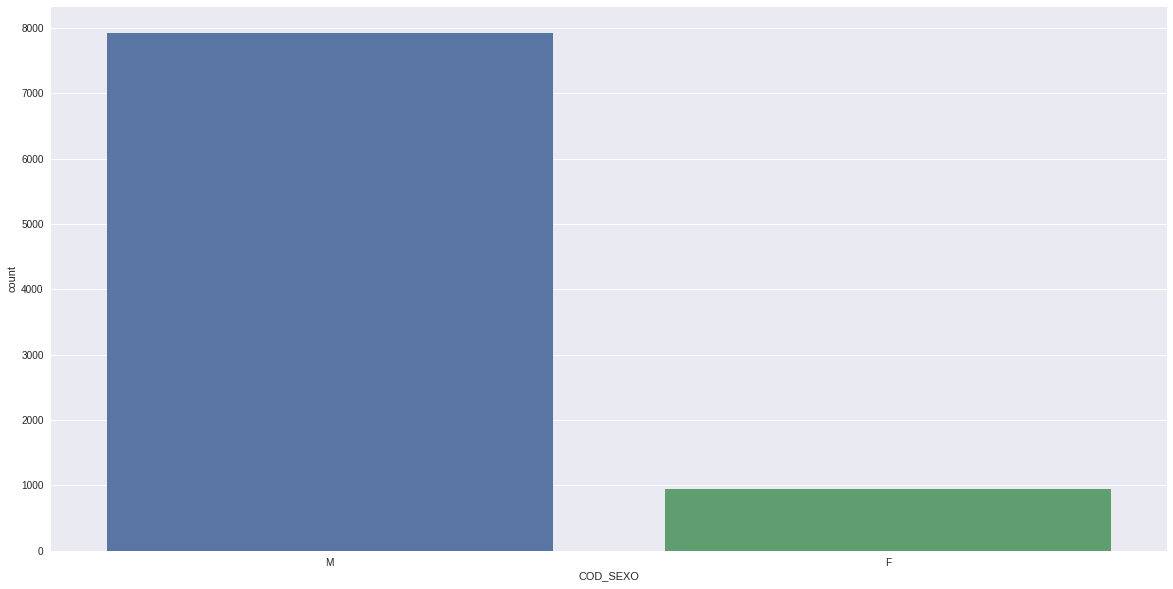

In [9]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['COD_SEXO'], label = "Quantidade")

In [10]:
gender_list = data['COD_SEXO'].tolist()
gender_counter = {}

for gender in gender_list:
    if gender in gender_counter:
        gender_counter[gender] += 1
    else:
        gender_counter[gender] = 1
        
gender_counter

{'M': 7922, 'F': 939, nan: 2446}

#### Grande maioria das proposições vieram de homens sendo que 2446 não informam o gênero da pessoa que propôs.

## Proposições x Temas

#### Ranking dos 6 temas mais frequentes:

In [11]:
theme_list = data['AREAS_TEMATICAS_APRESENTACAO'].tolist()
theme_counter = {}

for theme in theme_list:
    if theme in theme_counter:
        theme_counter[theme] += 1
    else:
        theme_counter[theme] = 1
        
popular_themes = sorted(theme_counter, key = theme_counter.get, reverse = True)
top_6 = popular_themes[:7]

for theme in top_6:
    print(theme + ': ' + str(theme_counter[theme]) + ' proposições')

COMUNICAÇÕES: 1477 proposições
TRIBUTAÇÃO: 657 proposições
TRABALHO E EMPREGO: 649 proposições
ADMINISTRAÇÃO PÚBLICA: 635 proposições
HOMENAGENS E DATAS COMEMORATIVAS: 487 proposições
EDUCAÇÃO: 480 proposições
DIREITOS HUMANOS, MINORIAS E CIDADANIA: 480 proposições


#### Lista com todos os temas e a quantidade de proposições relacionadas a eles entre 2010 e 2014 se encontra em *temas10_14.txt* dentro do diretório *temas* neste mesmo repositório.

## Proposições x Tipo do Autor

#### Ranking dos tipos de autores do mais frequente ao menos frequente:

In [37]:
author_type_list = data['DES_TIPO_AUTOR'].tolist()
author_type_counter = {}

for author_type in author_type_list:
    if author_type in author_type_counter:
        author_type_counter[author_type] += 1
    else:
        author_type_counter[author_type] = 1
        
popular_author_type = sorted(author_type_counter, key = author_type_counter.get, reverse = True)

for author_type in popular_author_type:
    if author_type_counter[author_type] != 1:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposições')
    else:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposição')

DEPUTADO: 8861 proposições
COMISSÃO PERMANENTE: 1487 proposições
ÓRGÃO DO PODER LEGISLATIVO: 524 proposições
ÓRGÃO DO PODER EXECUTIVO: 229 proposições
ÓRGÃO DO PODER JUDICIÁRIO: 86 proposições
COMISSÃO DIRETORA: 39 proposições
COMISSÃO MISTA PERMANENTE: 17 proposições
COMISSÃO ESPECIAL: 15 proposições
MPU - MINISTÉRIO PÚBLICO DA UNIÃO: 15 proposições
COMISSÃO PARLAMENTAR DE INQUÉRITO: 14 proposições
COMISSÃO PARLAMENTAR MISTA DE INQUÉRITO: 6 proposições
COMISSÃO EXTERNA: 6 proposições
DPU - DEFENSORIA PÚBLICA DA UNIÃO: 4 proposições
COMISSÃO MISTA ESPECIAL: 3 proposições
COMISSÃO PERMANENTE DO SENADO FEDERAL: 1 proposição


#### A grande maioria das proposições vieram diretamente dos deputados.

## Proposições x Ano

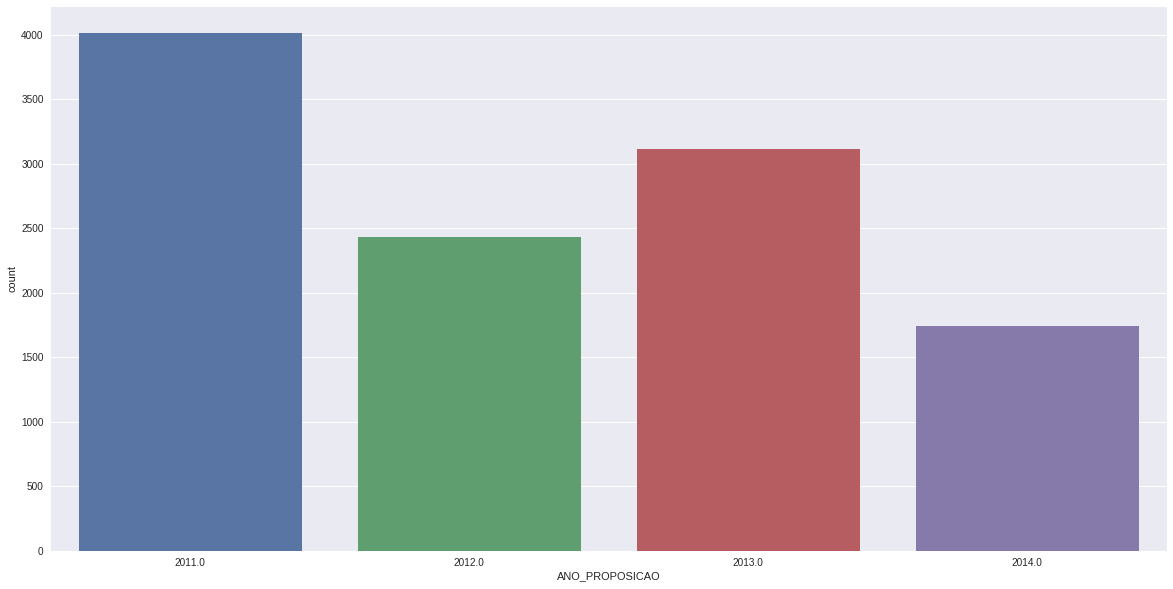

In [19]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['ANO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [38]:
year_list = data['ANO_PROPOSICAO'].tolist()
year_counter = {}

for year in year_list:
    if year in year_counter:
        year_counter[year] += 1
    else:
        year_counter[year] = 1
        
popular_year = sorted(year_counter, key = year_counter.get, reverse = True)

for year in popular_year:
    if year_counter[year] != 1:
        print(str(year) + ': ' + str(year_counter[year]) + ' proposições')

2011.0: 4011 proposições
2013.0: 3115 proposições
2012.0: 2433 proposições
2014.0: 1744 proposições


## Proposições x Região

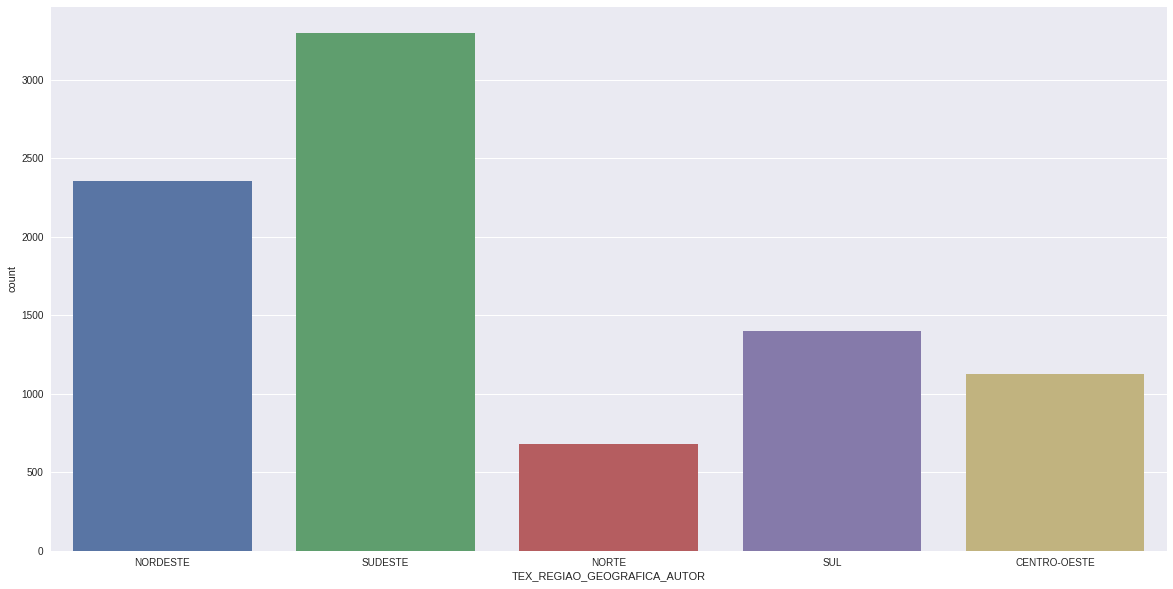

In [20]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['TEX_REGIAO_GEOGRAFICA_AUTOR'], label = "Quantidade")

#### Ranking:

In [39]:
region_list = data['TEX_REGIAO_GEOGRAFICA_AUTOR'].tolist()
region_counter = {}

for region in region_list:
    if region in region_counter:
        region_counter[region] += 1
    else:
        region_counter[region] = 1
        
popular_region = sorted(region_counter, key = region_counter.get, reverse = True)

for region in popular_region:
    if type(region) != float:
        print(region + ': ' + str(region_counter[region]) + ' proposições')
    else:
        print('Sem informação de região: ' + str(region_counter[region]) + ' proposições')

SUDESTE: 3297 proposições
Sem informação de região: 2448 proposições
NORDESTE: 2355 proposições
SUL: 1398 proposições
CENTRO-OESTE: 1126 proposições
NORTE: 683 proposições


## Proposições x Tipos

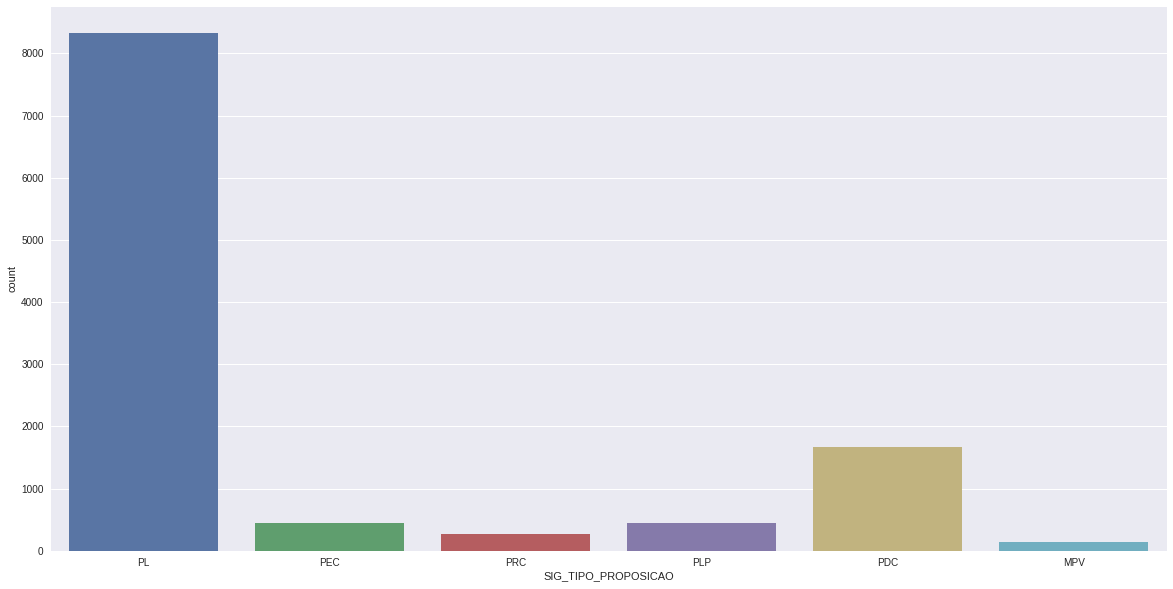

In [22]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_TIPO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [40]:
proposition_list = data['SIG_TIPO_PROPOSICAO'].tolist()
proposition_counter = {}

for proposition in proposition_list:
    if proposition in proposition_counter:
        proposition_counter[proposition] += 1
    else:
        proposition_counter[proposition] = 1
        
popular_proposition = sorted(proposition_counter, key = proposition_counter.get, reverse = True)

for proposition in popular_proposition:
    print(proposition + ': ' + str(proposition_counter[proposition]) + ' proposições')

PL: 8327 proposições
PDC: 1667 proposições
PLP: 455 proposições
PEC: 451 proposições
PRC: 268 proposições
MPV: 139 proposições


#### Legenda: 

* PL = Projetos de Lei 
* PDC = Projetos de Decreto Legislativo da Câmara
* PLP = Projetos de Lei Complementar
* PEC = Projetos de Emenda à Constituição
* MPV = Medidas Provisórias
* PRC = Projetos de Resolução da Câmara

## Proposições x Partidos Políticos

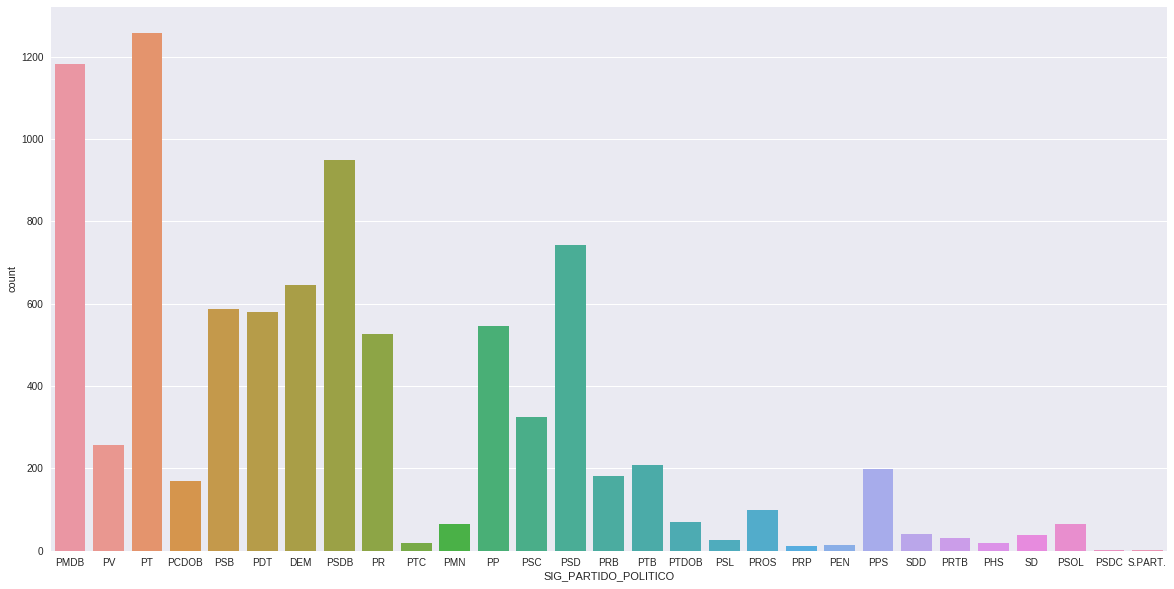

In [25]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_PARTIDO_POLITICO'], label = "Quantidade")

#### Ranking dos 6 partidos com mais proposições e as respectivas quantidades:

In [41]:
pp_list = data['SIG_PARTIDO_POLITICO'].tolist()
pp_counter = {}

for pp in pp_list:
    if pp in pp_counter:
        pp_counter[pp] += 1
    else:
        pp_counter[pp] = 1
        
popular_pp = sorted(pp_counter, key = pp_counter.get, reverse = True)
top_7 = popular_pp[:7]

for pp in top_7:
    if type(pp) != float:
        print(pp + ': ' + str(pp_counter[pp]) + ' proposições')
    else:
        print('Sem informação de partido: ' + str(pp_counter[pp]) + ' proposições')

Sem informação de partido: 2448 proposições
PT: 1257 proposições
PMDB: 1182 proposições
PSDB: 948 proposições
PSD: 743 proposições
DEM: 646 proposições
PSB: 588 proposições


#### Lista de todos os partidos e suas respectivas quantidades:

In [27]:
print(pp_counter)

{'PMDB': 1182, 'PV': 258, 'PT': 1257, 'PCDOB': 169, 'PSB': 588, 'PDT': 581, 'DEM': 646, 'PSDB': 948, 'PR': 527, 'PTC': 18, 'PMN': 64, 'PP': 545, 'PSC': 326, 'PSD': 743, 'PRB': 182, 'PTB': 209, 'PTDOB': 70, 'PSL': 26, 'PROS': 100, 'PRP': 11, 'PEN': 15, 'PPS': 199, 'SDD': 41, 'PRTB': 30, 'PHS': 18, 'SD': 38, 'PSOL': 64, 'PSDC': 3, nan: 2448, 'S.PART.': 1}


## Proposições x Nome do Parlamentar

#### Ranking dos 10 deputados com mais proposições:

In [42]:
name_list = data['NOM_PARLAMENTAR'].tolist()
name_counter = {}

for name in name_list:
    if name in name_counter:
        name_counter[name] += 1
    else:
        name_counter[name] = 1
        
popular_name = sorted(name_counter, key = name_counter.get, reverse = True)
top_10 = popular_name[:11]

for name in top_10:
    if type(name) != float:
        print(name + ': ' + str(name_counter[name]) + ' proposições')
    else:
        print('Sem informação do nome do deputado: ' + str(name_counter[name]) + ' proposições')

Sem informação do nome do deputado: 2446 proposições
WELITON PRADO: 172 proposições
MAJOR FÁBIO: 169 proposições
CARLOS BEZERRA: 159 proposições
ONOFRE SANTO AGOSTINI: 132 proposições
ROMERO RODRIGUES: 100 proposições
LAERCIO OLIVEIRA: 98 proposições
SANDRA ROSADO: 93 proposições
RICARDO IZAR: 91 proposições
ERIKA KOKAY: 89 proposições
SANDES JÚNIOR: 84 proposições


#### Média de proposições por deputado:

In [31]:
counter = 0
for name in name_counter:
    counter = counter + name_counter[name]
    
print("Média de proposições por candidato: %.2f" % ((counter-2446)/(len(name_counter)-1)))  # 2446 proposições sem nome do deputado (nan)

Média de proposições por candidato: 15.38


#### Lista com todos os deputados e a quantidade de proposições feitas por cada um durante todos os anos de mandato se encontra no arquivo *deputados&qnt_proposicoes_2010_2014.txt* dentro do diretório *deputados&qnt_proposicoes* neste mesmo repositório.